In [40]:
# importing csv reading in all csvs and converting to data frames

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

flo_man_loc_df = pd.read_csv('filtered_Local_Florida Man.csv')

In [41]:
keywords = ['committed', 'police', 'assault', 'shot', 'kill', 'murder', 'arrest', 'officer', 'gun', 'arson']

flo_man_df = flo_man_loc_df.dropna()
flo_man_df.count()

Unnamed: 0      138
Unnamed: 0.1    138
Title           138
Summary         138
Link            138
Time            138
Source          138
Category        138
Address         138
State           138
Zip             138
dtype: int64

In [42]:
# pulling rows from florida man local df that contain crime words, dropping duplicates, counting to compare to flo_man_loc_df

arrest = flo_man_df[flo_man_df['Summary'].str.contains('arrest')]
assault = flo_man_df[flo_man_df['Summary'].str.contains('assault')]
gun = flo_man_df[flo_man_df['Summary'].str.contains('gun')]
kill = flo_man_df[flo_man_df['Summary'].str.contains('kill')]
murder = flo_man_df[flo_man_df['Summary'].str.contains('murder')]
officer= flo_man_df[flo_man_df['Summary'].str.contains('officer')]
police = flo_man_df[flo_man_df['Summary'].str.contains('police')]
shot = flo_man_df[flo_man_df['Summary'].str.contains('shot')]

t_arrest = flo_man_df[flo_man_df['Title'].str.contains('arrest')]
t_assault = flo_man_df[flo_man_df['Title'].str.contains('assault')]
t_gun = flo_man_df[flo_man_df['Title'].str.contains('gun')]
t_kill = flo_man_df[flo_man_df['Title'].str.contains('kill')]
t_murder = flo_man_df[flo_man_df['Title'].str.contains('murder')]
t_officer= flo_man_df[flo_man_df['Title'].str.contains('officer')]
t_police = flo_man_df[flo_man_df['Title'].str.contains('police')]
t_shot = flo_man_df[flo_man_df['Title'].str.contains('shot')]


crimes_df = pd.concat([arrest, assault, gun, kill, murder, officer, police, shot, t_arrest, t_assault, t_gun, t_kill, t_murder, t_officer, t_police, t_shot])
crimes_df = crimes_df.drop_duplicates()
crimes_df['Crimes'] = 'Reports Crime'

crimes_df.count()

Unnamed: 0      101
Unnamed: 0.1    101
Title           101
Summary         101
Link            101
Time            101
Source          101
Category        101
Address         101
State           101
Zip             101
Crimes          101
dtype: int64

In [43]:
#finding complement of crimes_df in flo_man_df

idx_flo = flo_man_df.index
idx_cri = crimes_df.index

idx_law = idx_flo.difference(idx_cri)

#rowData = dfObj.loc[ ['c' , 'b'] , : ]

law_abiding = flo_man_df.loc[idx_law, :]
law_abiding_df = pd.DataFrame(law_abiding)
law_abiding_df['Crimes'] = 'Does Not Report Crime'

law_abiding_df.count()

Unnamed: 0      37
Unnamed: 0.1    37
Title           37
Summary         37
Link            37
Time            37
Source          37
Category        37
Address         37
State           37
Zip             37
Crimes          37
dtype: int64

In [44]:
local_report_df = pd.concat([crimes_df, law_abiding_df])

In [45]:
to_plot = local_report_df['Crimes'].tolist()
rc = to_plot.count('Reports Crime')
dnrc = to_plot.count('Does Not Report Crime')
length = len(to_plot)

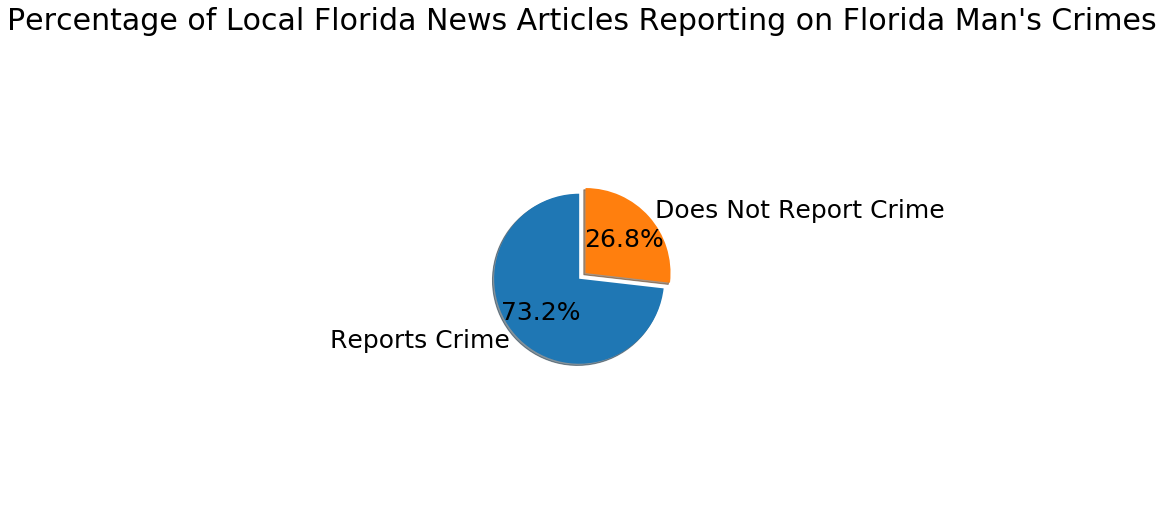

In [47]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Reports Crime', 'Does Not Report Crime']
sizes = [(rc/length*100), (dnrc/length*100)]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


ax1.set_title("Percentage of Local Florida News Articles Reporting on Florida Man's Crimes")
plt.rcParams.update({'font.size': 25})
fig1.set_size_inches(16, 8)
fig1.savefig('florida_local_crimes.png', dpi=100)
plt.tight_layout()
plt.show()